In [163]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import dot, multiply, diag, power
from numpy import pi, exp, sinh, cosh, tanh, sin, cos, real, imag
from numpy.linalg import inv, eig, pinv
from scipy.linalg import svd
from warnings import warn

In [164]:
# define time and space domains
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 6*pi, 80)
dt = t[2] - t[1]
Xm, Tm = np.meshgrid(x, t)

# Example - 3 traveling wave equations
f1 = 1*sin(0.1*Xm - 0.1*Tm)
f2 = 2*sin(0.2*Xm - 0.2*Tm)
f3 = 4*sin(0.4*Xm - 0.4*Tm)

# Example - 3 spatiotemporal patterns
# f1 = multiply(2*power(Xm, 2), exp((0.2j)*Tm))
# f2 = multiply(Xm, exp(0.1j*Tm))
# f3 = multiply(5*multiply(1/cosh(Xm/2), tanh(Xm/2)), 2*exp((0.1+0.4j)*Tm))

# combine signals and make data matrix
D = (f1 + f2 + f3).T

# create DMD input-output matrices
X = D[:,:-1]
Y = D[:,1:]

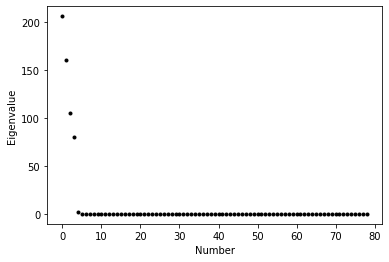

In [165]:
# SVD of input matrix
U2,Sig2,Vh2 = svd(X, False)

# plot eigenvalues - select reduced rank
plt.plot(Sig2, 'k.')
plt.xlabel('Number')
plt.ylabel('Eigenvalue')
plt.show()

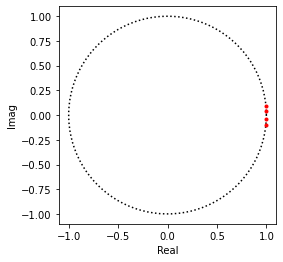

In [166]:
# rank truncation
r = 4
U = U2[:,:r]
Sig = diag(Sig2)[:r,:r]
V = Vh2.conj().T[:,:r]

# build A tilde
Atil = dot(dot(dot(U.conj().T, Y), V), inv(Sig))
mu,W = eig(Atil)

# Plot eigenvalues
theta = np.linspace(0, 2*np.pi, 100)
radius = 1.0 
a = radius * np.cos(theta)
b = radius * np.sin(theta) 
fig, axes = plt.subplots()
axes.plot(a, b, 'k:')
axes.set_aspect(1)
plt.plot(real(mu), imag(mu), 'r.')
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

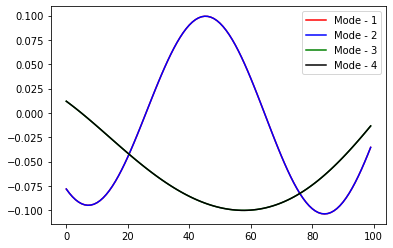

In [167]:
# build DMD modes
Phi = dot(dot(dot(Y, V), inv(Sig)), W)

# plot DMD modes (eigenvectors of A_tilde)
c = ['r-', 'b-', 'g-', 'k-']
for i in range(r):
    label='Mode - ' + str(i+1)
    plt.plot(Phi[:,i], c[i], label=label)
plt.legend()
plt.show()

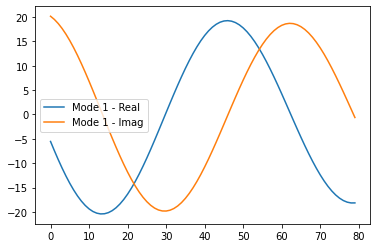

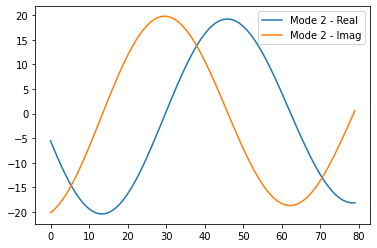

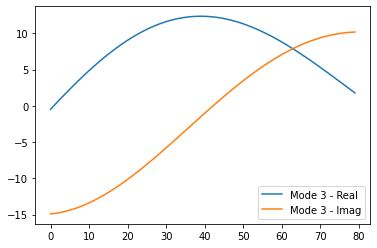

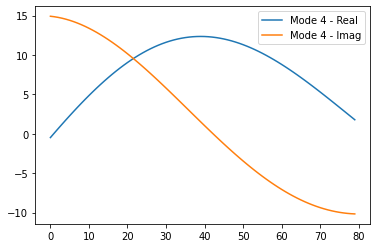

In [168]:
# compute time evolution
b = dot(pinv(Phi), X[:,0])
Psi = np.zeros([r, len(t)], dtype='complex')
for i,_t in enumerate(t):
    Psi[:,i] = multiply(power(mu, _t/dt), b)

for i in range(r):
    label = 'Mode ' + str(i + 1) + ' - '
    plt.plot(real(Psi[i,:]), label=label + 'Real')
    plt.plot(imag(Psi[i,:]), label=label + 'Imag')
    plt.legend()
    plt.show()


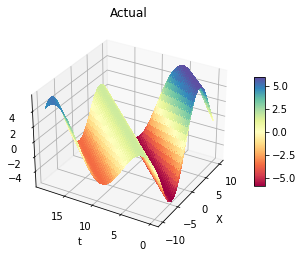

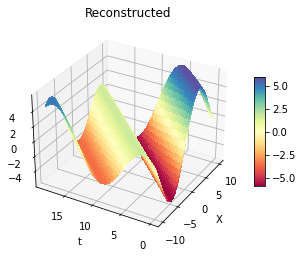

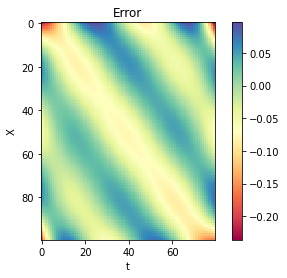

In [177]:
# compute DMD reconstruction
D2 = dot(Phi, Psi)
np.allclose(D, D2) # True

from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Xm, Tm, D.T, cmap=cm.Spectral, linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=210)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('t')
plt.show()

from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Xm, Tm, D2.T, cmap=cm.Spectral, linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=210)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.title('Reconstructed')
plt.xlabel('X')
plt.ylabel('t')
plt.show()

err = real(D - D2)
plt.imshow(err, cmap=cm.Spectral, interpolation='nearest')
plt.colorbar()
plt.title('Error')
plt.xlabel('t')
plt.ylabel('X')
plt.show()